<a href="https://colab.research.google.com/github/ankitkumarsingh1702/Data_analysis_assignment/blob/main/Aditi_di.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
import time
from networkx.algorithms.community import girvan_newman
from networkx.algorithms.community import louvain_communities

In [31]:
# Load LastFM data
lastfm_edges_path = "/content/sample_data/lastfm_asia_edges.csv"
lastfm_df = pd.read_csv(lastfm_edges_path)

# Load Wiki-Vote data
wiki_vote_path = "/content/sample_data/Wiki_Vote.txt"
wiki_vote_df = pd.read_csv(wiki_vote_path, sep='\t', comment='#', header=None, names=['FromNodeId', 'ToNodeId'])



In [32]:
# Helper function to create and plot subgraph
def create_subgraph(df, graph_type='undirected', node_column_1='node_1', node_column_2='node_2', sample_size=50):
    sampled_nodes = random.sample(df[node_column_1].unique().tolist(), sample_size)
    subset_df = df[df[node_column_1].isin(sampled_nodes) | df[node_column_2].isin(sampled_nodes)]

    if graph_type == 'undirected':
        G = nx.from_pandas_edgelist(subset_df, node_column_1, node_column_2)
    else:
        G = nx.from_pandas_edgelist(subset_df, node_column_1, node_column_2, create_using=nx.DiGraph)

    return G

In [33]:
# Question 1: Run the Girvan-Newman Algorithm on these data sets
# Create subgraphs for quicker computation
lastfm_subgraph = create_subgraph(lastfm_df, graph_type='undirected', node_column_1='node_1', node_column_2='node_2', sample_size=100)
wiki_vote_subgraph = create_subgraph(wiki_vote_df, graph_type='directed', node_column_1='FromNodeId', node_column_2='ToNodeId', sample_size=100)

In [34]:
# Apply Girvan-Newman Algorithm on LastFM subgraph
gn_communities_lastfm = girvan_newman(lastfm_subgraph)
top_level_communities_lastfm = next(gn_communities_lastfm)

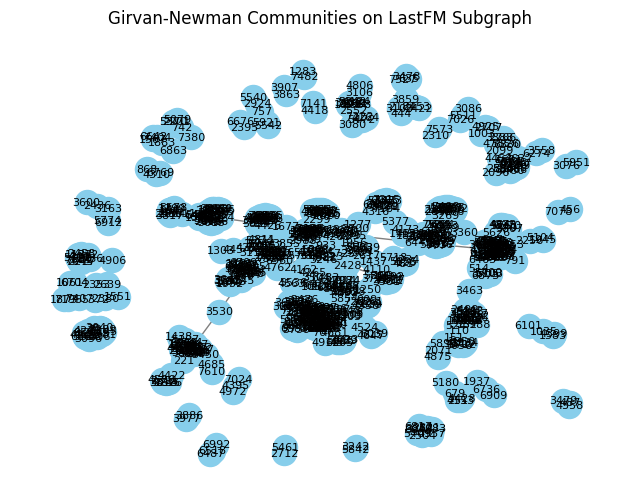

In [35]:
# Plot LastFM Girvan-Newman Result
plt.figure(figsize=(8, 6))
plt.title("Girvan-Newman Communities on LastFM Subgraph")
nx.draw(lastfm_subgraph, with_labels=True, node_size=300, node_color="skyblue", edge_color="gray", font_size=8)
plt.show()

In [36]:
# Apply Girvan-Newman Algorithm on Wiki-Vote subgraph
gn_communities_wiki_vote = girvan_newman(wiki_vote_subgraph)
top_level_communities_wiki_vote = next(gn_communities_wiki_vote)

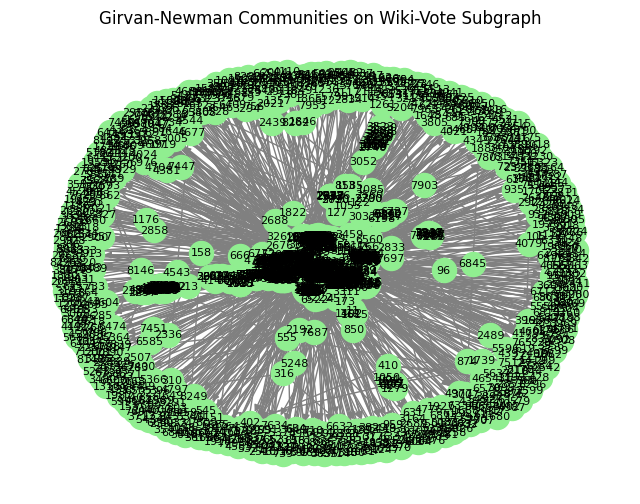

In [37]:
# Plot Wiki-Vote Girvan-Newman Result
plt.figure(figsize=(8, 6))
plt.title("Girvan-Newman Communities on Wiki-Vote Subgraph")
nx.draw(wiki_vote_subgraph, with_labels=True, node_size=300, node_color="lightgreen", edge_color="gray", font_size=8)
plt.show()

In [38]:
# Reduce subgraph size for quicker computation
reduced_sample_size = 30

# Create smaller subgraphs
lastfm_subgraph_small = create_subgraph(lastfm_df, graph_type='undirected', node_column_1='node_1', node_column_2='node_2', sample_size=reduced_sample_size)
wiki_vote_subgraph_small = create_subgraph(wiki_vote_df, graph_type='directed', node_column_1='FromNodeId', node_column_2='ToNodeId', sample_size=reduced_sample_size)

In [39]:
# Apply Girvan-Newman Algorithm on smaller LastFM subgraph
gn_communities_lastfm_small = girvan_newman(lastfm_subgraph_small)
top_level_communities_lastfm_small = next(gn_communities_lastfm_small)

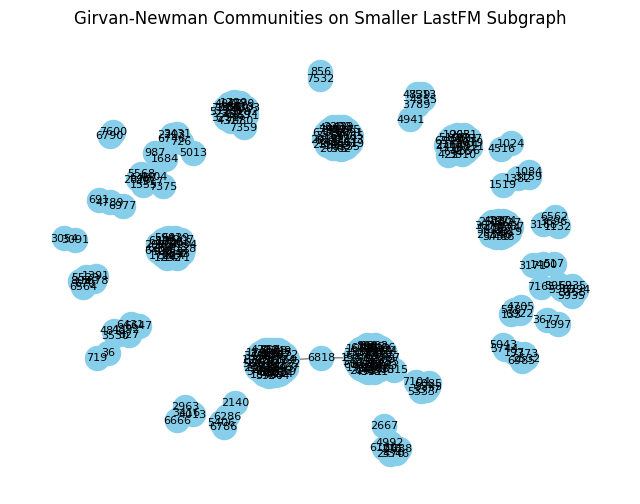

In [40]:
# Plot LastFM Girvan-Newman Result (smaller subgraph)
plt.figure(figsize=(8, 6))
plt.title("Girvan-Newman Communities on Smaller LastFM Subgraph")
nx.draw(lastfm_subgraph_small, with_labels=True, node_size=300, node_color="skyblue", edge_color="gray", font_size=8)
plt.show()

In [41]:
# Apply Girvan-Newman Algorithm on smaller Wiki-Vote subgraph
gn_communities_wiki_vote_small = girvan_newman(wiki_vote_subgraph_small)
top_level_communities_wiki_vote_small = next(gn_communities_wiki_vote_small)

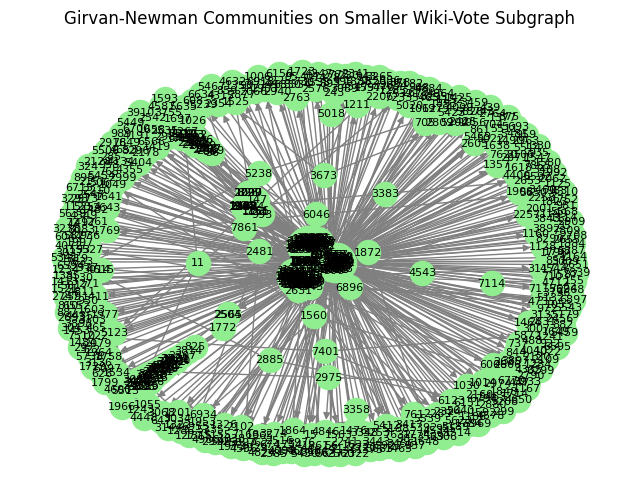

In [42]:
# Plot Wiki-Vote Girvan-Newman Result (smaller subgraph)
plt.figure(figsize=(8, 6))
plt.title("Girvan-Newman Communities on Smaller Wiki-Vote Subgraph")
nx.draw(wiki_vote_subgraph_small, with_labels=True, node_size=300, node_color="lightgreen", edge_color="gray", font_size=8)
plt.show()

In [43]:
# Apply Louvain Algorithm on LastFM subgraph
start_time = time.time()
louvain_communities_lastfm = louvain_communities(lastfm_subgraph_small)
louvain_runtime_lastfm = time.time() - start_time

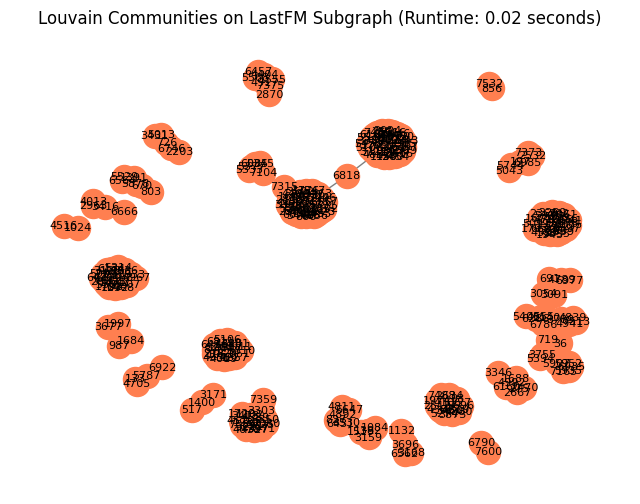

In [44]:
# Plot Louvain Result for LastFM Subgraph
plt.figure(figsize=(8, 6))
plt.title(f"Louvain Communities on LastFM Subgraph (Runtime: {louvain_runtime_lastfm:.2f} seconds)")
nx.draw(lastfm_subgraph_small, with_labels=True, node_size=300, node_color="coral", edge_color="gray", font_size=8)
plt.show()

In [45]:
# Apply Louvain Algorithm on Wiki-Vote subgraph
start_time = time.time()
louvain_communities_wiki_vote = louvain_communities(wiki_vote_subgraph_small)
louvain_runtime_wiki_vote = time.time() - start_time

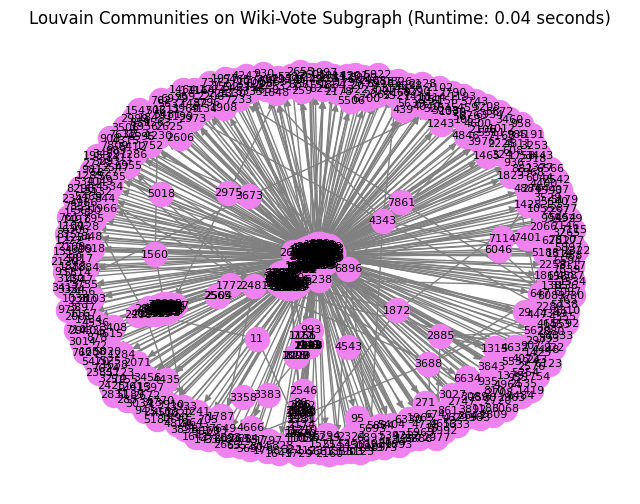

In [46]:
# Plot Louvain Result for Wiki-Vote Subgraph
plt.figure(figsize=(8, 6))
plt.title(f"Louvain Communities on Wiki-Vote Subgraph (Runtime: {louvain_runtime_wiki_vote:.2f} seconds)")
nx.draw(wiki_vote_subgraph_small, with_labels=True, node_size=300, node_color="violet", edge_color="gray", font_size=8)
plt.show()

In [47]:
# Answer for Question 7
print("In my opinion, the Louvain algorithm gave rise to better communities compared to the Girvan-Newman algorithm because it is more scalable to large networks, producing meaningful community structures quickly. The Girvan-Newman algorithm, while effective, becomes computationally expensive as network size increases, making it less suitable for large-scale networks.")

In my opinion, the Louvain algorithm gave rise to better communities compared to the Girvan-Newman algorithm because it is more scalable to large networks, producing meaningful community structures quickly. The Girvan-Newman algorithm, while effective, becomes computationally expensive as network size increases, making it less suitable for large-scale networks.
